Stock Prediction Application

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [3]:
start = '2020-01-01'
end = '2025-03-31'

df = yf.download('AAPL', start, end)
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716072,72.776598,71.466812,71.721019,135480400
2020-01-03,72.009102,72.771729,71.783947,71.941313,146322800
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200
2020-01-07,72.241554,72.849231,72.021238,72.592601,108872000
2020-01-08,73.403633,73.706264,71.943744,71.943744,132079200


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-03-24,220.729996,221.479996,218.580002,221.000000,44299500
2025-03-25,223.750000,224.100006,220.080002,220.770004,34493600
2025-03-26,221.529999,225.020004,220.470001,223.509995,34466100
2025-03-27,223.850006,224.990005,220.559998,221.389999,37094800
2025-03-28,217.899994,223.809998,217.679993,221.669998,39818600


In [5]:
df= df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-01-02,72.716072,72.776598,71.466812,71.721019,135480400
1,2020-01-03,72.009102,72.771729,71.783947,71.941313,146322800
2,2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200
3,2020-01-07,72.241554,72.849231,72.021238,72.592601,108872000
4,2020-01-08,73.403633,73.706264,71.943744,71.943744,132079200


In [7]:
df= df.drop(['Date'], axis=1)
df.head()

<ipython-input-7-9ba46a5d1291>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df= df.drop(['Date'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,72.716072,72.776598,71.466812,71.721019,135480400
1,72.009102,72.771729,71.783947,71.941313,146322800
2,72.582916,72.621654,70.876083,71.127873,118387200
3,72.241554,72.849231,72.021238,72.592601,108872000
4,73.403633,73.706264,71.943744,71.943744,132079200


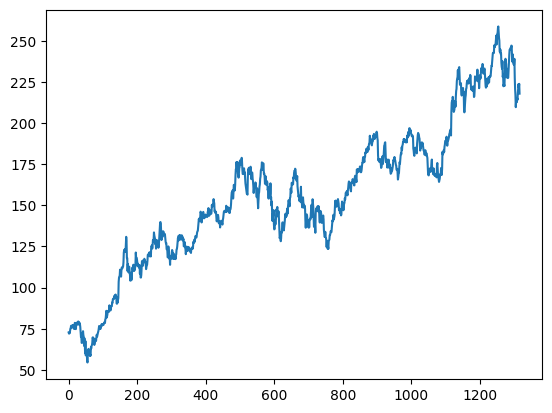

In [8]:
plt.plot(df.Close)

In [9]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,72.716072,72.776598,71.466812,71.721019,135480400
1,72.009102,72.771729,71.783947,71.941313,146322800
2,72.582916,72.621654,70.876083,71.127873,118387200
3,72.241554,72.849231,72.021238,72.592601,108872000
4,73.403633,73.706264,71.943744,71.943744,132079200
...,...,...,...,...,...
1312,220.729996,221.479996,218.580002,221.000000,44299500
1313,223.750000,224.100006,220.080002,220.770004,34493600
1314,221.529999,225.020004,220.470001,223.509995,34466100


In [18]:
ma100 = df.Close.rolling(100).mean()
ma100


Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1312,234.857403
1313,234.766028
1314,234.649760
1315,234.592313


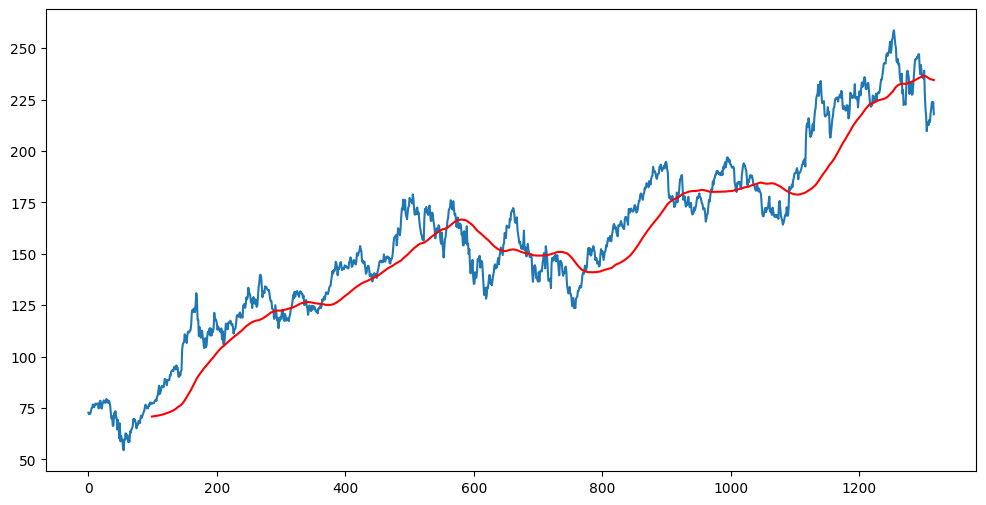

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [20]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1312,228.083552
1313,228.226233
1314,228.364740
1315,228.502837


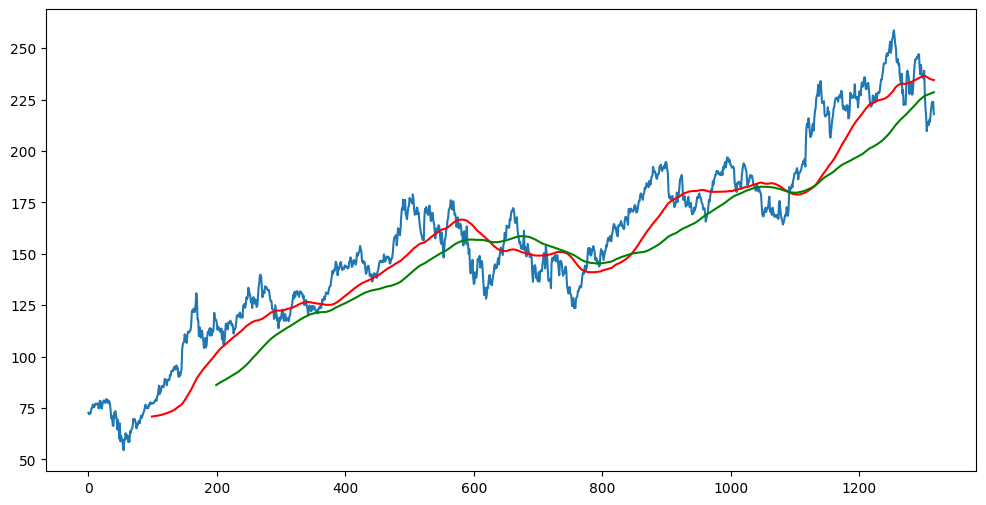

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [22]:
df.shape

(1317, 5)

Splitting Data into Data Training and Data Testing

In [23]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(921, 1)
(396, 1)


In [24]:
data_training.head()

Ticker,AAPL
0,72.716072
1,72.009102
2,72.582916
3,72.241554
4,73.403633


In [25]:
data_testing.head()

Ticker,AAPL
921,186.284653
922,186.503067
923,188.081497
924,188.319763
925,181.579178


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [28]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.13018656],
       [0.12514785],
       [0.12923753],
       [0.12680458],
       [0.13508694],
       [0.14619936],
       [0.14740716],
       [0.15884752],
       [0.15146232],
       [0.14915008],
       [0.15587945],
       [0.16190167],
       [0.15817462],
       [0.16012438],
       [0.1627644 ],
       [0.161177  ],
       [0.14502603],
       [0.16010709],
       [0.17158187],
       [0.17077085],
       [0.14599246],
       [0.14452561],
       [0.16210873],
       [0.16659514],
       [0.17308303],
       [0.16545547],
       [0.1680844 ],
       [0.1647289 ],
       [0.17785693],
       [0.17382679],
       [0.17396523],
       [0.16367384],
       [0.17166474],
       [0.16592246],
       [0.15338266],
       [0.12766318],
       [0.11019414],
       [0.11809836],
       [0.0850108 ],
       [0.08473408],
       [0.12875277],
       [0.11233879],
       [0.13555039],
       [0.11856529],
       [0.11183722],
       [0.07229804],
       [0.10545493],
       [0.088

In [29]:
data_training_array.shape

(921, 1)

In [31]:
x_train=[]
y_train=[]

for i in range(100, data_training.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

ML MODEL(LSTM)

In [39]:
!pip show tensorflow
!pip show keras

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras
Name: keras
Version: 3.8.0
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow


In [40]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [42]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1))) # Added LSTM layer instance
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True)) # Added LSTM layer instance
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True)) # Added LSTM layer instance
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu')) # Added LSTM layer instance
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Added Dense layer instance

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='adam', loss ='mean_squared_error')
model.fit(x_train, y_train, epochs= 50 )

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 288ms/step - loss: 0.2460
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - loss: 0.0283
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 260ms/step - loss: 0.0186
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 278ms/step - loss: 0.0145
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 234ms/step - loss: 0.0136
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 236ms/step - loss: 0.0131
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 259ms/step - loss: 0.0135
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 283ms/step - loss: 0.0128
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 253ms/step - loss: 0.0131
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 256ms/step - loss: 0.0113
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 284ms/step - loss: 0.0105
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 286ms/step - loss: 0.0124
Epoch 13/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 236ms/step - loss: 0.0130
Epoch 14/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - loss: 0.0109
Epoch 15/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 236ms/s

In [46]:
model.save('Keras_model.h5')

In [47]:
data_testing.head()

Ticker,AAPL
921,186.284653
922,186.503067
923,188.081497
924,188.319763
925,181.579178


In [49]:
past_100_days= data_training.tail(100)

In [52]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [53]:
final_df.head()

Ticker,AAPL
0,163.016037
1,160.412277
2,159.194565
3,158.501572
4,163.907059


In [55]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.04503929],
       [0.01906246],
       [0.00691376],
       [0.        ],
       [0.05392871],
       [0.05047168],
       [0.05066897],
       [0.06291678],
       [0.0743742 ],
       [0.06469439],
       [0.04859497],
       [0.05165696],
       [0.03624882],
       [0.03614972],
       [0.08207804],
       [0.09462179],
       [0.09373291],
       [0.08336197],
       [0.07259613],
       [0.05620032],
       [0.13304387],
       [0.13235228],
       [0.11526518],
       [0.13294477],
       [0.13482148],
       [0.12552423],
       [0.12057883],
       [0.12057883],
       [0.12671133],
       [0.15005333],
       [0.15114118],
       [0.14164633],
       [0.11553478],
       [0.11830403],
       [0.12967848],
       [0.15381163],
       [0.17230734],
       [0.17181304],
       [0.19990239],
       [0.20840834],
       [0.19485819],
       [0.19119854],
       [0.17745064],
       [0.20465019],
       [0.20850759],
       [0.23649799],
       [0.23175065],
       [0.238

In [57]:
input_data.shape

(496, 1)

In [58]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [59]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(396, 100, 1)
(396,)


Making Predictions

In [63]:
y_predict = model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


In [61]:
y_predict.shape

(396, 1)

In [64]:
y_test

array([0.27718239, 0.27936144, 0.2951089 , 0.297486  , 0.23023746,
       0.17725045, 0.18339087, 0.19507786, 0.16477156, 0.14407184,
       0.15922515, 0.1519952 , 0.18131108, 0.1922057 , 0.1567491 ,
       0.14129849, 0.14981616, 0.16259267, 0.1217877 , 0.1066344 ,
       0.1092094 , 0.11435955, 0.13951585, 0.12614549, 0.13862469,
       0.15100478, 0.17655734, 0.19141334, 0.18547082, 0.19943549,
       0.20844838, 0.19002666, 0.18873908, 0.17318982, 0.16021541,
       0.15645194, 0.13089953, 0.13208801, 0.13644579, 0.11327033,
       0.07157405, 0.08474636, 0.10524787, 0.11000207, 0.1416949 ,
       0.17734956, 0.16823788, 0.19379028, 0.21944195, 0.2300391 ,
       0.22528536, 0.26723465, 0.25136723, 0.27754851, 0.28320133,
       0.30006039, 0.29986188, 0.31731617, 0.3092832 , 0.31592766,
       0.30263874, 0.30085367, 0.30690306, 0.29668846, 0.30244053,
       0.31523364, 0.29728353, 0.33685283, 0.32594405, 0.34528236,
       0.35956307, 0.33447253, 0.34964608, 0.38187675, 0.38336

In [65]:
y_predict

array([[0.34655437],
       [0.33975145],
       [0.3334118 ],
       [0.32776648],
       [0.3229987 ],
       [0.31915998],
       [0.3161625 ],
       [0.31385753],
       [0.31208548],
       [0.31066316],
       [0.30939648],
       [0.3081199 ],
       [0.30672348],
       [0.30512542],
       [0.30329478],
       [0.30120122],
       [0.29881233],
       [0.29614443],
       [0.2932226 ],
       [0.2901068 ],
       [0.28686512],
       [0.28351015],
       [0.28000212],
       [0.2763902 ],
       [0.27269086],
       [0.2688994 ],
       [0.26503605],
       [0.2611552 ],
       [0.2573414 ],
       [0.25372157],
       [0.25036314],
       [0.24732964],
       [0.24466798],
       [0.24237487],
       [0.24042103],
       [0.23877552],
       [0.23739724],
       [0.23623057],
       [0.23522958],
       [0.23434407],
       [0.23351678],
       [0.23268335],
       [0.23180068],
       [0.23084918],
       [0.22982676],
       [0.22873548],
       [0.22763002],
       [0.226

In [66]:
scaler.scale_

array([0.00997666])

In [67]:
scale_factor = 1/0.00997666
y_predict = y_predict* scale_factor
y_test= y_test* scale_factor

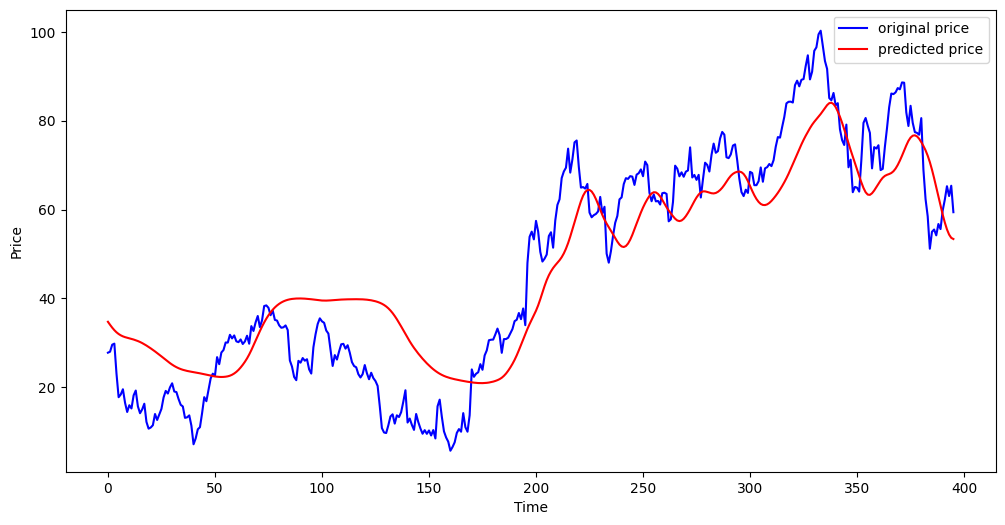

In [68]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'original price')
plt.plot(y_predict, 'r', label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()